In [2]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp 
import matplotlib.pyplot as plt
import seaborn as sns
import os, wget, shutil

In [4]:
os.makedirs("data", exist_ok=True)
link_original = "https://s3.amazonaws.com/openneuro.org/ds004148/participants.tsv?versionId=wt81Mu2B3fdeiXSis5ym288A64lXRXkR"
wget.download(link_original)
filename = "participants.tsv"
file_ = [os.path.join(root, file) for root, _, files in os.walk(os.getcwd()) for file in files if file == filename]
shutil.copy2(file_[0], "data")
os.remove(file_[0])
print(f"\nOriginal file downloaded.")

100% [..........................................................] 39886 / 39886
Original file downloaded.


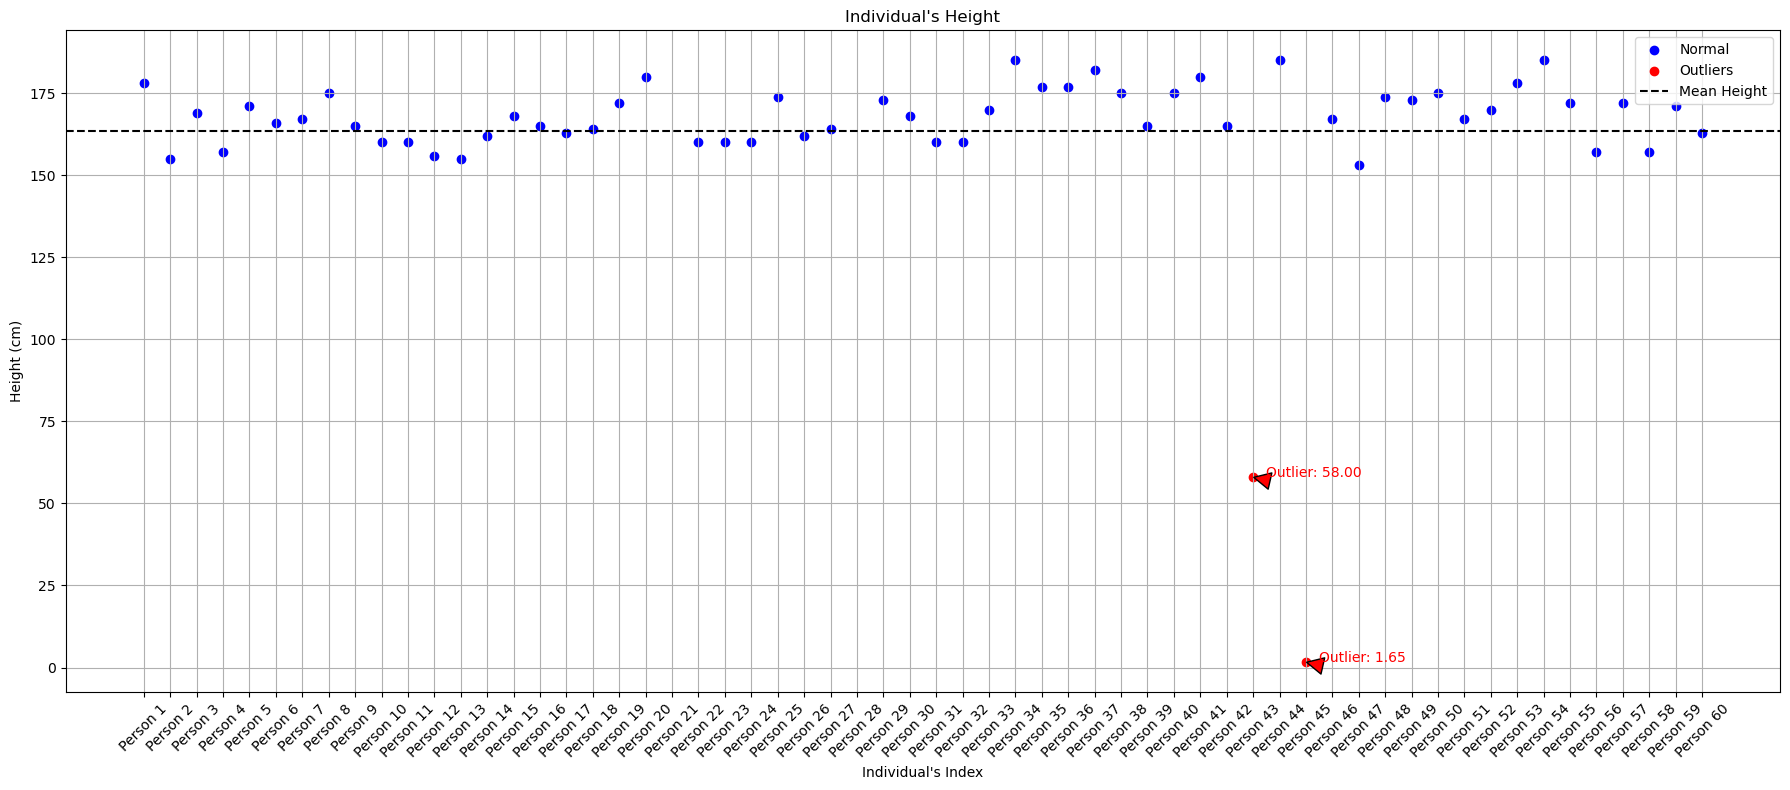

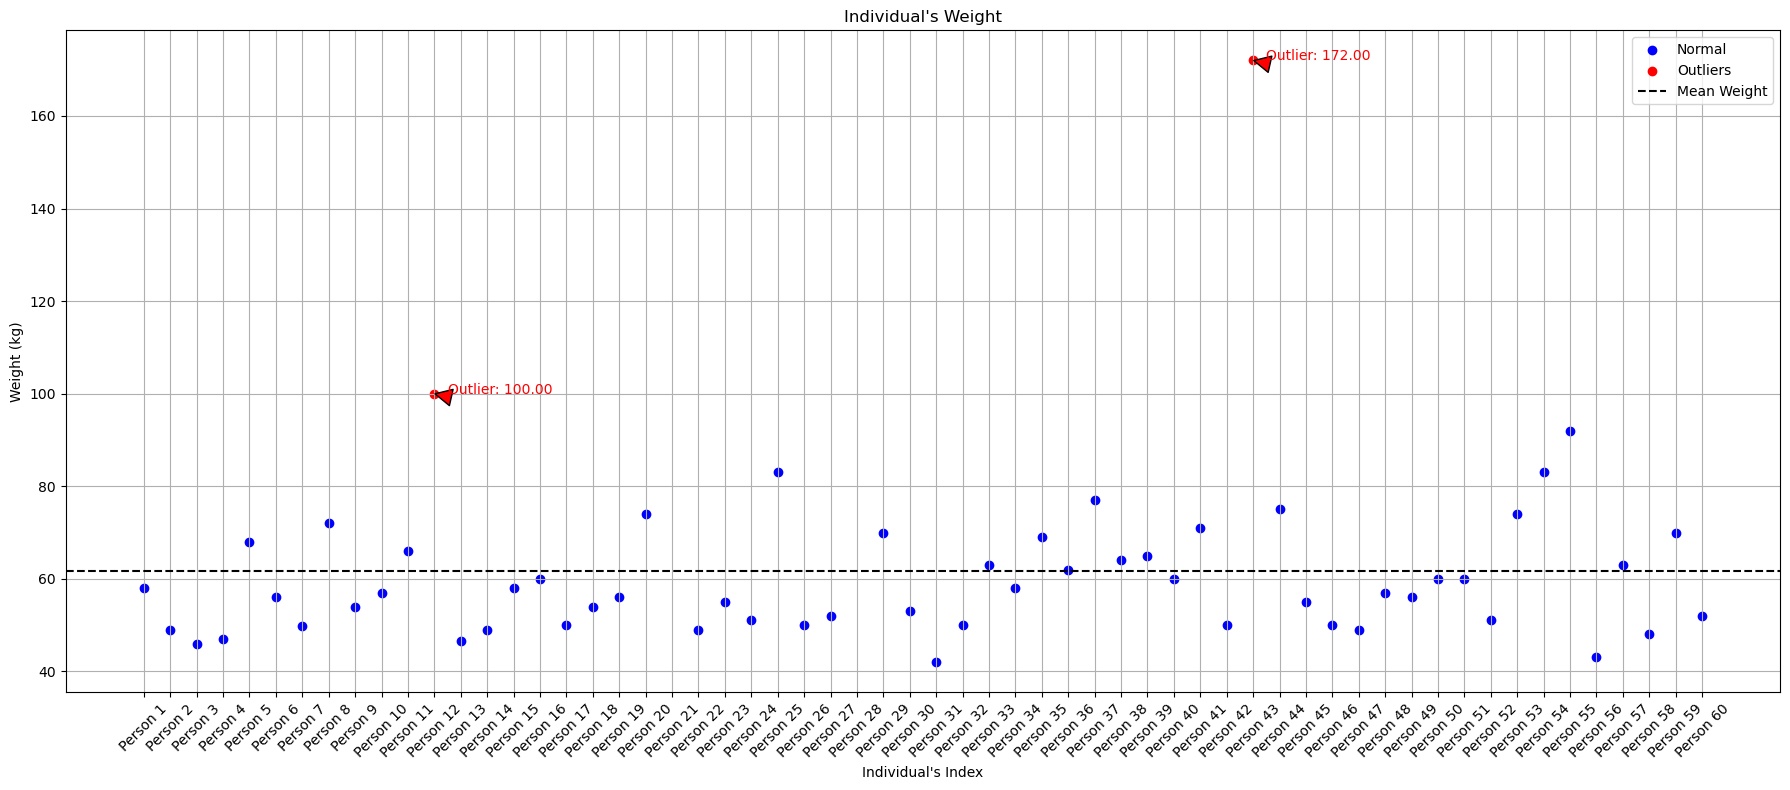

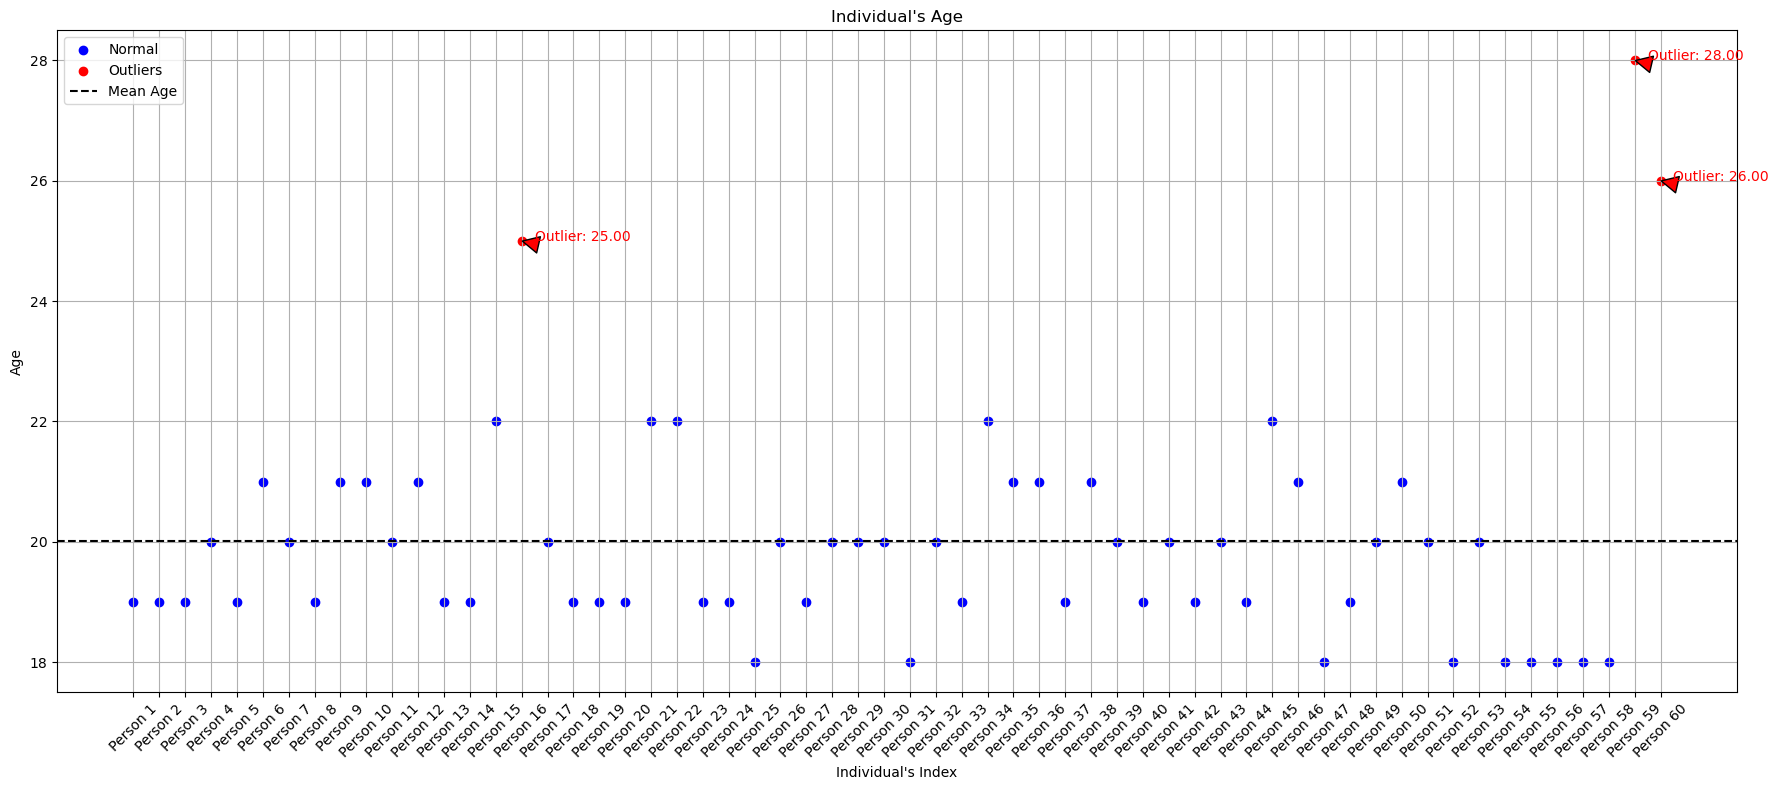

In [14]:
df = pd.read_csv("data/" + filename, delim_whitespace="\t")
height = np.array(df["Height"]).reshape(-1, 1)
weight = np.array(df["Weight"]).reshape(-1, 1)
age = np.array(df["age"]).reshape(-1, 1)

def plot_(data, title, ylabel):
    clean_data = data[~np.isnan(data)]
    q1 = np.percentile(clean_data, 25)
    q3 = np.percentile(clean_data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_indices = np.where((data < lower_bound) | (data > upper_bound))[0]
    null_indices = np.where(np.isnan(data))[0]
    normal_indices = [i for i in range(len(data)) if i not in outlier_indices and i not in null_indices]

    plt.figure(figsize=(18, 8))
    plt.scatter(normal_indices, data[normal_indices], color='blue', label='Normal')
    plt.scatter(outlier_indices, data[outlier_indices], color='red', label='Outliers')

    for outlier_idx in outlier_indices:
        plt.annotate(f'Outlier: {data[outlier_idx][0]:.2f}', 
                    xy=(outlier_idx, data[outlier_idx]),
                    xytext=(outlier_idx+0.5, data[outlier_idx]),
                    arrowprops=dict(facecolor='red', shrink=0.05),
                    color='red')

    plt.axhline(np.nanmean(data), color='black', linestyle='--', label=f'Mean {title}')
    plt.title(f"Individual's {title}")
    plt.xlabel("Individual's Index")
    plt.xticks(range(len(data)), [f"Person {i + 1}" for i in range(len(data))], rotation=45)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_(height, "Height", "Height (cm)")
plot_(weight, "Weight", "Weight (kg)")
plot_(age, "Age", "Age")
